In [56]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [26]:
ct_buildings = gpd.read_file(r'C:\Users\wh145\Documents\Energy Initiative\SolarMapper\solarmapper_paper\solar_pv_paper\shapefiles\Connecticut.geojson')

In [27]:
ct_buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
ct_buildings['building_area_sqm'] = ct_buildings.to_crs('epsg:26956').area

In [29]:
ct_buildings.head()

,release,capture_dates_range,geometry,building_area_sqm
0,1,,"POLYGON ((-71.78189 41.63973, -71.78203 41.639...",142.525498
1,1,,"POLYGON ((-71.78402 41.62289, -71.78398 41.622...",113.545170
2,1,,"POLYGON ((-71.78402 41.70014, -71.78396 41.700...",255.339227
3,1,,"POLYGON ((-71.78407 41.69986, -71.78411 41.699...",165.668872
4,1,,"POLYGON ((-71.78621 41.63769, -71.78610 41.637...",80.007254


In [30]:
ct_labeled = gpd.read_file(r'C:\Users\wh145\Documents\Energy Initiative\SolarMapper\solarmapper_paper\solar_pv_paper\ct_labeled_tile_boundaries_gcs.geojson')
ct_labeled = ct_labeled.to_crs('epsg:4326')

In [31]:
tile_list_dict = {}
tile_list_base = Path(r'ct_data\all_ct_labeled\tile_list')

for set_name in ['train', 'valid']:
    with open(tile_list_base / f'tile_list_{set_name}_non_random.txt', 'r') as f:
        tile_list_dict[set_name] = [l.strip('\n') for l in f.readlines()]

In [32]:
ct_labeled = ct_labeled.reset_index()

In [33]:
ct_labeled.columns

Index(['index', 'GM_LAYER', 'GM_TYPE', 'NAME', 'LAYER', 'MAP_NAME', 'FILENAME',
       'DESCRIPTIO', 'UPPER_LE_X', 'UPPER_LE_Y', 'LOWER_RI_X', 'LOWER_RI_Y',
       'WEST_LONGI', 'NORTH_LATI', 'EAST_LONGI', 'SOUTH_LATI', 'UL_CORNER_',
       'UL_CORNER1', 'UR_CORNER_', 'UR_CORNER1', 'LR_CORNER_', 'LR_CORNER1',
       'LL_CORNER_', 'LL_CORNER1', 'PROJ_DESC', 'PROJ_DATUM', 'PROJ_UNITS',
       'EPSG_CODE', 'COVERED_AR', 'LOAD_TIME', 'NUM_COLUMN', 'NUM_ROWS',
       'NUM_BANDS', 'COLOR_BAND', 'PIXEL_WIDT', 'PIXEL_HEIG', 'BIT_DEPTH',
       'SAMPLE_TYP', 'PCS_CITATI', 'PHOTOMETRI', 'BIT_DEPTH1', 'SAMPLE_FOR',
       'TILE_WIDTH', 'TILE_HEIGH', 'COMPRESSIO', 'PIXEL_SCAL', 'TIEPOINTS',
       'MODEL_TYPE', 'RASTER_TYP', 'Shape_Leng', 'Shape_Area', 'tile_name',
       'housing_units', 'population', 'geometry'],
      dtype='object')

In [34]:
dataset = []
for tile_name in ct_labeled.tile_name.tolist():
    if tile_name in tile_list_dict['train']:
        dataset.append('train')
    else:
        dataset.append('valid')

In [35]:
ct_labeled['dataset'] = dataset

In [36]:
ct_labeled_skim = ct_labeled[['tile_name', 'housing_units', 'population', 'dataset', 'geometry']]

In [37]:
ct_buildings

,release,capture_dates_range,geometry,building_area_sqm
0,1,,"POLYGON ((-71.78189 41.63973, -71.78203 41.639...",142.525498
1,1,,"POLYGON ((-71.78402 41.62289, -71.78398 41.622...",113.545170
2,1,,"POLYGON ((-71.78402 41.70014, -71.78396 41.700...",255.339227
3,1,,"POLYGON ((-71.78407 41.69986, -71.78411 41.699...",165.668872
4,1,,"POLYGON ((-71.78621 41.63769, -71.78610 41.637...",80.007254
...,...,...,...,...
1215619,1,,"POLYGON ((-73.70643 41.08481, -73.70639 41.084...",142.862634
1215620,1,,"POLYGON ((-73.70722 41.08370, -73.70703 41.083...",589.582436
1215621,1,,"POLYGON ((-73.71246 41.07935, -73.71230 41.079...",113.775154
1215622,1,,"POLYGON ((-73.71359 41.09311, -73.71369 41.093...",212.751026


In [38]:
ms_building_tile_join = gpd.overlay(ct_labeled_skim, ct_buildings, how='intersection')

In [39]:
ms_building_tile_join.head()

,tile_name,housing_units,population,dataset,release,capture_dates_range,building_area_sqm,geometry
0,995820_ne,718.0,1750.0,valid,2,7/15/2019-8/29/2019,243.590518,"POLYGON ((-72.75000 41.72070, -72.75002 41.720..."
1,995820_ne,718.0,1750.0,valid,2,7/15/2019-8/29/2019,119.089402,"POLYGON ((-72.75000 41.71959, -72.75018 41.719..."
2,995820_ne,718.0,1750.0,valid,2,7/15/2019-8/29/2019,138.729976,"POLYGON ((-72.75458 41.71916, -72.75458 41.719..."
3,995820_ne,718.0,1750.0,valid,2,7/15/2019-8/29/2019,134.437137,"POLYGON ((-72.75532 41.72363, -72.75521 41.723..."
4,995820_ne,718.0,1750.0,valid,2,7/15/2019-8/29/2019,169.816790,"POLYGON ((-72.75620 41.72062, -72.75622 41.720..."


In [40]:
ms_building_area_by_tile = ms_building_tile_join.groupby('tile_name').sum()['building_area_sqm']

In [41]:
ms_building_count_by_tile = ms_building_tile_join.groupby('tile_name').count()['geometry']

In [42]:
ms_building_count_by_tile

tile_name
000795_sw     35
000800_ne     70
005680_sw    104
005815_ne    327
005865_sw    192
            ... 
965765_nw    151
975745_sw     24
980760_sw     90
990755_nw    286
995820_ne    378
Name: geometry, Length: 86, dtype: int64

In [43]:
ms_building_stats_by_tile = pd.concat([ms_building_count_by_tile, ms_building_area_by_tile], axis=1)

In [44]:
ct_labeled_skim

,tile_name,housing_units,population,dataset,geometry
0,995820_ne,718.0,1750.0,valid,"POLYGON ((-72.75916 41.72530, -72.75000 41.725..."
1,990755_nw,955.0,2540.0,valid,"POLYGON ((-72.78653 41.54691, -72.77740 41.546..."
2,980760_sw,404.0,810.0,train,"POLYGON ((-72.82307 41.55375, -72.81394 41.553..."
3,975745_sw,180.0,549.0,train,"POLYGON ((-72.84128 41.51257, -72.83215 41.512..."
4,965765_nw,422.0,1055.0,train,"POLYGON ((-72.87792 41.57429, -72.86878 41.574..."
...,...,...,...,...,...
82,005865_sw,466.0,1246.0,train,"POLYGON ((-72.73165 41.84193, -72.72248 41.841..."
83,005815_ne,663.0,1651.0,train,"POLYGON ((-72.72253 41.71157, -72.71338 41.711..."
84,005680_sw,364.0,944.0,train,"POLYGON ((-72.73179 41.33422, -72.72269 41.334..."
85,000800_ne,522.0,1536.0,train,"POLYGON ((-72.74085 41.67041, -72.73170 41.670..."


In [45]:
ms_building_stats_by_tile = ms_building_stats_by_tile.join(ct_labeled_skim.set_index('tile_name')['dataset'])

array([[<AxesSubplot:title={'center':'geometry'}>,
        <AxesSubplot:title={'center':'building_area_sqm'}>]], dtype=object)

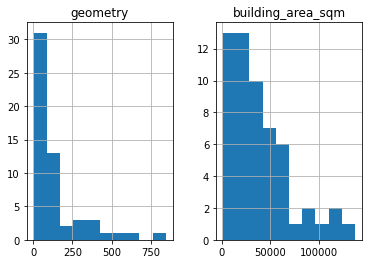

In [46]:
ms_building_stats_by_tile.query('dataset == "train"').hist()

array([[<AxesSubplot:title={'center':'geometry'}>,
        <AxesSubplot:title={'center':'building_area_sqm'}>]], dtype=object)

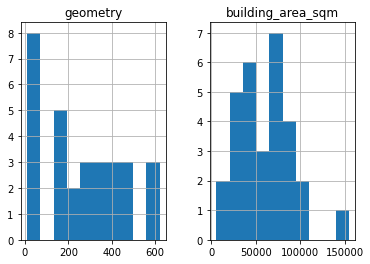

In [47]:
ms_building_stats_by_tile.query('dataset == "valid"').hist()

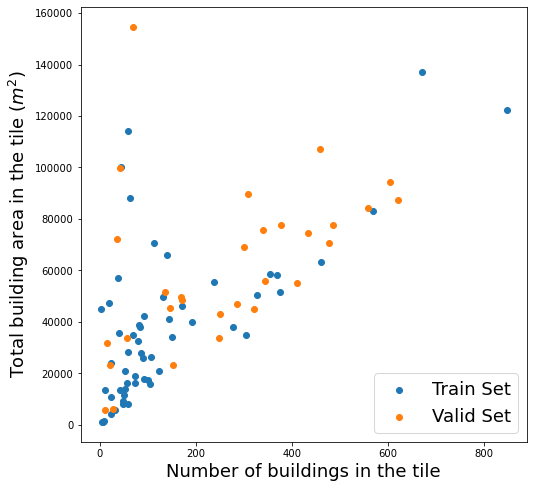

In [48]:
plt.figure(figsize=(8, 8))

for set_name in ['train', 'valid']:
    set_slice = ms_building_stats_by_tile.query(f'dataset == "{set_name}"')
    plt.scatter(set_slice.geometry, set_slice.building_area_sqm, label=f'{set_name} set'.title())
    
plt.xlabel('Number of buildings in the tile', fontsize=18)
plt.ylabel('Total building area in the tile ($m^2$)', fontsize=18)
plt.legend(fontsize=18)
plt.show()

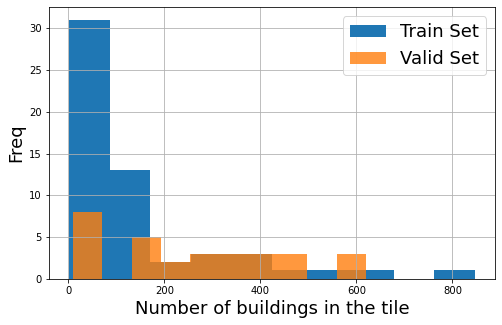

In [49]:
column_name = 'geometry'
title = 'Number of buildings in the tile'

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

for i, set_name in enumerate(['train', 'valid']):
    set_slice = ms_building_stats_by_tile.query(f'dataset == "{set_name}"')
    set_slice[f'{column_name}'].hist(bins=10, alpha=1-i*0.2, ax=ax, label=f'{set_name} set'.title())
    
plt.legend(fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.xlabel(title, fontsize=18)
plt.show()

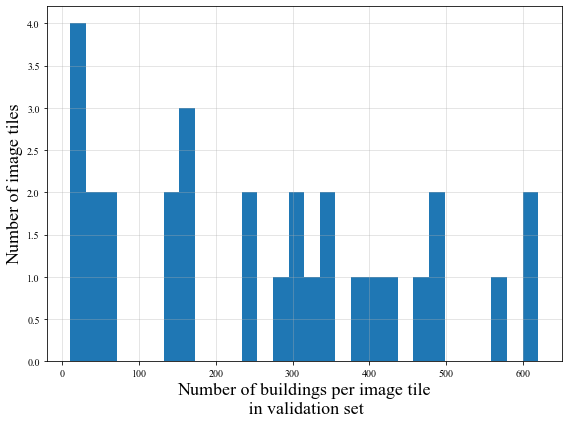

In [67]:
column_name = 'geometry'
title = 'Number of buildings per image tile\n in validation set'

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for i, set_name in enumerate(['valid']):
    set_slice = ms_building_stats_by_tile.query(f'dataset == "{set_name}"')
    set_slice[f'{column_name}'].hist(bins=30, alpha=1-i*0.2, ax=ax, label=f'{set_name} set'.title())
    
# plt.legend(fontsize=18)
plt.grid(visible=True, alpha=0.4)
plt.ylabel('Number of image tiles', fontsize=18)
plt.xlabel(title, fontsize=18)
plt.tight_layout()
plt.savefig(
    'final_resutls/ct_stratified_microsoft/valid_hist.png', dpi=300
)
plt.show()

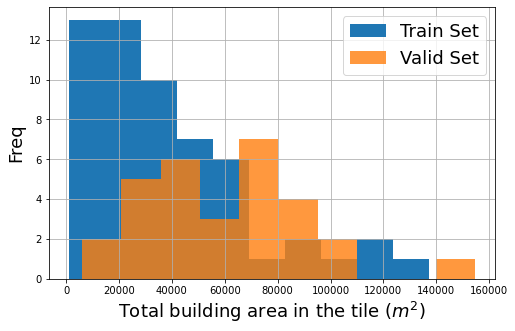

In [50]:
column_name = 'building_area_sqm'
title = 'Total building area in the tile ($m^2$)'

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

for i, set_name in enumerate(['train', 'valid']):
    set_slice = ms_building_stats_by_tile.query(f'dataset == "{set_name}"')
    set_slice[f'{column_name}'].hist(bins=10, alpha=1-i*0.2, ax=ax, label=f'{set_name} set'.title())
    
plt.legend(fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.xlabel(title, fontsize=18)
plt.show()

In [51]:
ms_building_stats_by_tile.query('dataset == "train"').describe()

,geometry,building_area_sqm
count,56.000000,56.000000
mean,141.910714,38510.756671
std,171.910577,30685.678096
min,2.000000,1111.982498
25%,47.000000,16267.528820
50%,80.000000,34483.364786
75%,145.000000,50693.590314
max,847.000000,137139.595046


In [52]:
ms_building_stats_by_tile.query('dataset == "valid"').describe()

,geometry,building_area_sqm
count,30.000000,30.000000
mean,262.500000,61177.078902
std,188.299605,31894.584340
min,10.000000,5889.372198
25%,86.500000,43742.433442
50%,268.000000,55645.202267
75%,402.000000,77668.233105
max,620.000000,154706.556227


In [ ]:
building_by_tile_dict = {}

In [ ]:
building_by_tile_dict['low'] = ms_building_stats_by_tile.query('dataset == "valid" and geometry <= 87').index.tolist()
building_by_tile_dict['med'] = ms_building_stats_by_tile.query('dataset == "valid" and geometry > 87 and geometry <= 402').index.tolist()
building_by_tile_dict['high'] = ms_building_stats_by_tile.query('dataset == "valid" and geometry > 402').index.tolist()

In [ ]:
for k, v in building_by_tile_dict.items():
    print(k, len(v))

low 8
med 14
high 8


In [ ]:
building_by_tile_dict['low']

['000795_sw',
 '080905_nw',
 '080910_sw',
 '120915_sw',
 '785700_sw',
 '915745_ne',
 '930650_ne',
 '935655_sw']

In [90]:
out_dir = Path('final_resutls') / 'stratified_microsoft'
valid_tiles_dir = Path(r'ct_data\all_ct_labeled\valid')

In [91]:
from shutil import copy2

In [96]:
for k, tile_list in building_by_tile_dict.items():
    outpath = out_dir / f'{k}_density_tiles'
    if not outpath.exists():
        outpath.mkdir(parents=True)
        
    # for tile_name in tile_list:
    #     copy2(
    #         valid_tiles_dir / f'{tile_name}.jpg',
    #         outpath
    #     )
    
    with open(out_dir / f'{k}_density_tile_list.txt', 'w') as f:
        f.writelines([l + '\n' for l in tile_list])